In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Загрузка данных**

In [51]:
movie=pd.read_csv("moviesVariant2.csv", low_memory=False)
rating=pd.read_csv("RatingsVariant2.csv", low_memory=False)

In [52]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [54]:
rating['userId'].nunique()

668

In [55]:
print(movie.shape)
print(rating.shape)

(10329, 3)
(105339, 4)


In [56]:
data=movie.merge(rating,on='movieId')

In [57]:
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


**Обработка данных**

In [59]:
data.describe()

,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [60]:
df=data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [61]:
df.drop(columns=["movieId"],axis=1,inplace=True)
df.drop(columns=["timestamp"],axis=1,inplace=True)

In [62]:
df.shape

(105339, 4)

In [63]:
df.describe()

,userId,rating
count,105339.000000,105339.000000
mean,364.924539,3.516850
std,197.486905,1.044872
min,1.000000,0.500000
25%,192.000000,3.000000
50%,383.000000,3.500000
75%,557.000000,4.000000
max,668.000000,5.000000


In [64]:
import re  

df["title"] = df["title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Les\AppData\Local\Temp\ipykernel_17604\2580538189.py:3: SyntaxWarning: invalid escape sequence '\W'
  df["title"] = df["title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())


,title,genres,userId,rating
0,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,14,4.0


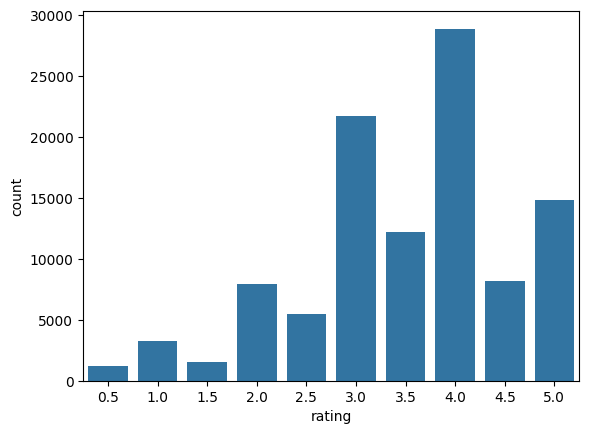

In [65]:
sns.countplot(data=df , x='rating')
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   title   105339 non-null  object 
 1   genres  105339 non-null  object 
 2   userId  105339 non-null  int64  
 3   rating  105339 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


**Система рекомендаций на основе взвешенных рейтингов**

Взвешенные: рекомендациям, полученным разными методами, присваивается различный вес – то есть, некоторые рекомендации считаются более предпочтительными, нежели другие.

In [67]:
avg_ratings = df.groupby('title')['rating'].mean().reset_index().rename(columns={'rating': 'avg_rating'})
rating_counts = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'rating_count'})


avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

avg = avg.merge(rating_counts, on='title')

In [68]:
avg.head(10)

,title,avg_rating,rating_count
0,Hunchback of Notre Dame The Notre Dame de Pari...,5.0,1
1,Limelight 1952,5.0,1
2,Dream Man 1995,5.0,1
3,Sherlock Holmes and the Voice of Terror 1942,5.0,1
4,Lawless Heart The 2003,5.0,1
5,Heima 2007,5.0,1
6,Beast of War The Beast The 1988,5.0,1
7,From One Second to the Next 2013,5.0,1
8,Long Gray Line The 1955,5.0,1
9,Memories Memorîzu 1995,5.0,2


In [69]:
avg[avg['title']=='Interstellar (2014)']

,title,avg_rating,rating_count


In [70]:
v=avg["rating_count"]
R=avg["avg_rating"]
m=v.quantile(0.90)
c=R.mean()
avg['w_score']=((v*R) + (m*c)) / (v+m)

In [71]:
avg["rating_count"].describe()

count    10323.000000
mean        10.204301
std         22.834557
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        325.000000
Name: rating_count, dtype: float64

In [72]:
pop_sort=avg.sort_values('w_score',ascending=False)

In [73]:
pop_sort

,title,avg_rating,rating_count,w_score
412,Shawshank Redemption The 1994,4.454545,308,4.358650
434,Godfather The 1972,4.392857,210,4.263534
482,Usual Suspects The 1995,4.328947,228,4.215141
501,Schindler s List 1993,4.296371,248,4.193885
516,Matrix The 1999,4.264368,261,4.169338
...,...,...,...,...
9133,Anaconda 1997,2.041667,36,2.507058
9711,Super Mario Bros 1993,1.807692,26,2.479031
9087,Wild Wild West 1999,2.164179,67,2.439463
9719,Speed 2 Cruise Control 1997,1.774194,31,2.400546


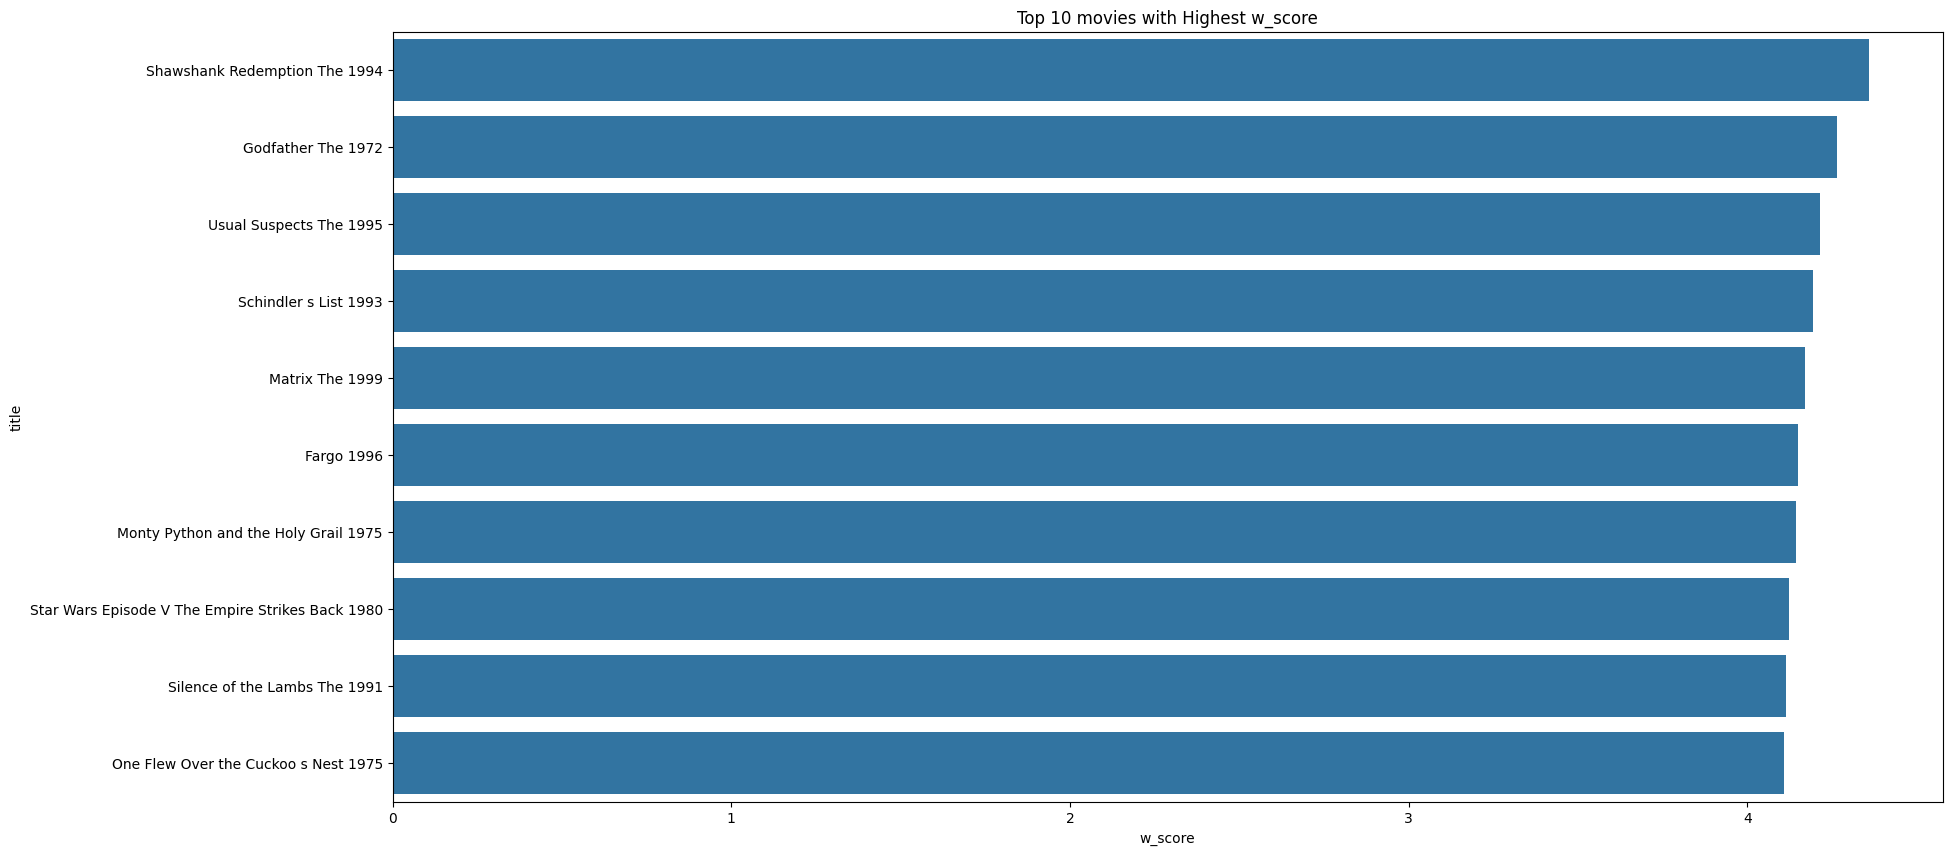

In [74]:
top_10_books = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='title', data=top_10_books)
plt.xlabel('w_score')
plt.ylabel('title')
plt.title('Top 10 movies with Highest w_score')
plt.show()

**Cистема рекомендаций по коллаборативной фильтрации (с использованием корреляции)**

In [75]:
new_df=df[df['userId'].map(df['userId'].value_counts()) > 200]  

In [76]:
new_df

,title,genres,userId,rating
7,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,29,4.0
10,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,32,4.0
11,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,38,5.0
12,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,44,1.5
16,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,54,3.0
...,...,...,...,...
105334,A Very Murray Christmas 2015,Comedy,475,3.0
105335,The Big Short 2015,Drama,458,4.0
105336,The Big Short 2015,Drama,576,4.5
105337,The Big Short 2015,Drama,668,4.5


In [77]:
users_pivot=new_df.pivot_table(index=["userId"],columns=["title"],values="rating")
users_pivot.fillna(0,inplace=True)

In [78]:
users_pivot.head()

title,10 000 BC 2008,10 1979,10 Items or Less 2006,10 Things I Hate About You 1999,10 to Midnight 1983,100 Girls 2000,101 Dalmatians 1996,101 Dalmatians One Hundred and One Dalmatians 1961,101 Reykjavik 101 Reykjavík 2000,102 Dalmatians 2000,...,Zulu 1964,a k a Tommy Chong 2005,batteries not included 1987,burbs The 1989,eXistenZ 1999,loudQUIETloud A Film About the Pixies 2006,night Mother 1986,xXx 2002,xXx State of the Union 2005,À nous la liberté Freedom for Us 1931
userId,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
def same_movie(movie):
    users_vote_movie=users_pivot[movie]
    similar_with=users_pivot.corrwith(users_vote_movie)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [80]:
same_movie('Interstellar 2014')

                                            correlation
title                                                  
10 000 BC 2008                                 0.312675
10 1979                                        0.161714
10 Items or Less 2006                          0.158344
10 Things I Hate About You 1999                0.056741
10 to Midnight 1983                           -0.026732
...                                                 ...
loudQUIETloud A Film About the Pixies 2006    -0.026732
night Mother 1986                             -0.026732
xXx 2002                                       0.201778
xXx State of the Union 2005                    0.162311
À nous la liberté Freedom for Us 1931          0.273578

[9978 rows x 1 columns]
                              correlation
title                                    
Interstellar 2014                1.000000
Gravity 2013                     0.840017
Gone Girl 2014                   0.710154
22 Jump Street 2014              0.70

,correlation
title,
Interstellar 2014,1.000000
Gravity 2013,0.840017


**Коллаборативная фильтрация: модель NearestNeighbours из scikit-learn для вашей системы рекомендаций**

Коллаборативная фильтрация — популярный метод построения систем рекомендаций, основанных на предпочтениях и поведении пользователей. 
Методы коллаборативной фильтрации дают рекомендации, используя шаблоны и отношения между пользователями и объектами.

Коллаборативная фильтрация на основе пользователей. Этот подход идентифицирует пользователей, похожих на целевого пользователя, на основе их предпочтений, а затем рекомендует элементы, которые понравились этим похожим пользователям. Предполагается, что если пользователи A и B имели схожие предпочтения в прошлом, то то, что нравится одному из них, может понравиться и другому.

In [81]:
df.head()

,title,genres,userId,rating
0,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,Toy Story 1995,Adventure|Animation|Children|Comedy|Fantasy,14,4.0


In [82]:
users_pivot

title,10 000 BC 2008,10 1979,10 Items or Less 2006,10 Things I Hate About You 1999,10 to Midnight 1983,100 Girls 2000,101 Dalmatians 1996,101 Dalmatians One Hundred and One Dalmatians 1961,101 Reykjavik 101 Reykjavík 2000,102 Dalmatians 2000,...,Zulu 1964,a k a Tommy Chong 2005,batteries not included 1987,burbs The 1989,eXistenZ 1999,loudQUIETloud A Film About the Pixies 2006,night Mother 1986,xXx 2002,xXx State of the Union 2005,À nous la liberté Freedom for Us 1931
userId,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


movieMatrix = csr_matrix(users_pivot.values)
movieMatrix = movieMatrix.transpose()

def find_similar_movie(movie_name, num_neighbors=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(movieMatrix)
    
    # Find the index of the input book
    movie_index = users_pivot.columns.get_loc(movie_name)

    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(movieMatrix[movie_index], n_neighbors=num_neighbors+1)
    # Exclude the first index (which is the input book itself)
    similar_indices = indices[0][1:]
    
    # Get the names of similar books based on indices
    list_similar_movie = [users_pivot.columns[idx] for idx in similar_indices]
    similar_movie=pd.DataFrame({"Похожие фильмы":list_similar_movie})
    return similar_movie



In [84]:
# Example usage
input_book = "Interstellar 2014"  
find_similar_movie(input_book)

,Похожие фильмы
0,Gravity 2013
1,Skyfall 2012
2,Gone Girl 2014
3,22 Jump Street 2014
4,Dark Knight Rises The 2012
5,Public Enemies 2009
6,Lucy 2014
7,Shutter Island 2010
8,Wolf of Wall Street The 2013
9,Inside Out 2015


In [85]:
input_book = "Gravity 2013"  
find_similar_movie(input_book)

,Похожие фильмы
0,Interstellar 2014
1,Ex Machina 2015
2,22 Jump Street 2014
3,Lucy 2014
4,Paul 2011
5,Wolf of Wall Street The 2013
6,The Imitation Game 2014
7,Voices from the List 2004
8,Birdman Or The Unexpected Virtue of Ignorance ...
9,Fury 2014


Добавим нового пользователя с определенным жанровым вкусом

In [86]:
# Фильтрация датафрейма по жанрам Sci-Fi, Fantasy, Animation
filtered_genres = ['Sci-Fi', 'Fantasy', 'Animation']
filtered_movies = df[df['genres'].apply(lambda x: any(genre in x for genre in filtered_genres))]

# Группировка данных по title, чтобы удалить дубликаты фильмов
grouped_movies = filtered_movies.groupby('title').first().reset_index()

# Выбор первых 150 фильмов из отфильтрованного и сгруппированного датафрейма
selected_movies = grouped_movies.head(150)

# Добавление нового пользователя с id 669 и расстановка оценок от 2 до 5
new_user_id = 669
new_ratings = selected_movies.copy()
new_ratings['userId'] = new_user_id
new_ratings['rating'] = np.random.randint(2, 6, size=len(new_ratings))
my_df = pd.concat([df, new_ratings], ignore_index=True)

In [87]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105489 entries, 0 to 105488
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   title   105489 non-null  object 
 1   genres  105489 non-null  object 
 2   userId  105489 non-null  int64  
 3   rating  105489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [88]:
new_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   150 non-null    object
 1   genres  150 non-null    object
 2   userId  150 non-null    int64 
 3   rating  150 non-null    int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 4.2+ KB


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   title   105339 non-null  object 
 1   genres  105339 non-null  object 
 2   userId  105339 non-null  int64  
 3   rating  105339 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [90]:
new_my_df=my_df[my_df['userId'].map(my_df['userId'].value_counts()) > 149]  

In [94]:
users_pivot2=new_my_df.pivot_table(index=["userId"],columns=["title"],values="rating")
users_pivot2.fillna(0,inplace=True)
movieMatrix2 = csr_matrix(users_pivot2.values)

In [95]:
def find_favorite_books(User_id, num_books=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(movieMatrix2)
    
    # Find the index of the input user
    user_index = users_pivot2.index.get_loc(User_id)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(movieMatrix2[user_index], n_neighbors=num_books+1)
    # Exclude the first index (which is the input user's own preferences)
    favorite_indices = indices[0][1:]
    
    # Get the names of favorite books based on indices
    list_favorite_books = [users_pivot2.columns[idx] for idx in favorite_indices]
    favorite_books=pd.DataFrame({"favorite books ":list_favorite_books})
    return favorite_books

In [99]:
find_favorite_books(668)

,favorite books
0,9th Company 2005
1,50 50 2011
2,3 Ninjas High Noon On Mega Mountain 1998
3,21 Up 1977
4,21 2008
5,1492 Conquest of Paradise 1992
6,42nd Street 1933
7,11 14 2003
8,5 Days of War 2011
9,Abominable Dr Phibes The 1971


In [100]:
my_df.to_csv('filmRatingsNew.csv', index=False)